# WEEK 6: Trees

## 1. Import Libraries

In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [167]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

## 2. Load Data

In [168]:
df = pd.read_csv('jamb_exam_results.csv')
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [169]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  student_id                    5000 non-null   int64  
 12  age                           5000 non-null   int64  
 13  gen

## 3. Data preparation

Preparation:

- Remove the student_id column.
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [171]:
df.drop(columns=['student_id'], inplace=True)

In [172]:
df.describe(include='all').round()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000,5000,5000,5000,5000,5000,5000.0,5000,5000,4109,5000.0
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,3,3,NaN,2,3,3,NaN
top,NaN,NaN,NaN,NaN,NaN,Public,Urban,Yes,Yes,Medium,Medium,NaN,Female,Medium,Secondary,NaN
freq,NaN,NaN,NaN,NaN,NaN,3735,2834,2721,3346,2012,1970,NaN,2530,1967,1556,NaN
mean,174.0,20.0,84.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,2.0
std,48.0,10.0,9.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0
min,100.0,0.0,50.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,1.0
25%,135.0,13.0,78.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,1.0
50%,170.0,19.0,84.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,1.0
75%,209.0,26.0,91.0,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,2.0


In [173]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [174]:
df['parent_education_level'].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [175]:
# df['parent_education_level'].fillna('Unknown', inplace=True)  # Handle NaN
# ordinal_mapping = {'Primary': 1, 'Secondary': 2, 'Tertiary': 3, 'Unknown': 0}
# df['parent_education_level'] = df['parent_education_level'].map(ordinal_mapping)


# df['parent_education_level']

### 1. Split data into train, validation and test sets

In [176]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=1)

In [177]:
len(df_train), len(df_test), len(df_val)

(3000, 1000, 1000)

In [178]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [179]:
# Split between X (features) and y (target)
X_train = df_train.drop('jamb_score', axis=1)
y_train = df_train['jamb_score']

X_test = df_test.drop('jamb_score', axis=1)
y_test = df_test['jamb_score']

X_val = df_val.drop('jamb_score', axis=1)
y_val = df_val['jamb_score']

In [180]:
print(len(X_train)*100/len(df))
print(len(X_test)*100/len(df))
print(len(X_val)*100/len(df))

60.0
20.0
20.0


### 2. Encoding with DictVectorizer

In [181]:
dict_train = X_train.fillna(0).to_dict(orient='records')
dict_val = X_val.fillna(0).to_dict(orient='records')
dict_test = X_test.fillna(0).to_dict(orient='records')

In [182]:
dict_train[0]

{'study_hours_per_week': 20,
 'attendance_rate': 72,
 'teacher_quality': 3,
 'distance_to_school': 4.4,
 'school_type': 'Public',
 'school_location': 'Urban',
 'extra_tutorials': 'No',
 'access_to_learning_materials': 'Yes',
 'parent_involvement': 'Medium',
 'it_knowledge': 'Low',
 'age': 21,
 'gender': 'Female',
 'socioeconomic_status': 'Low',
 'parent_education_level': 0,
 'assignments_completed': 3}

In [183]:
dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

## 4. Model training

### 1. Decision tree

In [184]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

QUESTION 1: Which feature is used for splitting the data?

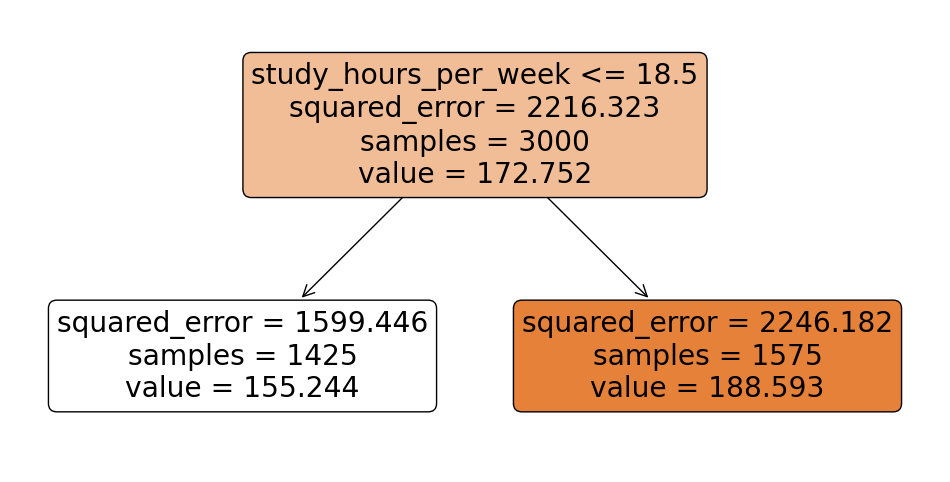

In [185]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=dv.get_feature_names_out(), filled=True, rounded=True)
plt.show()

### 2. Random forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_val)

QUESTION 2: What's the RMSE of this model on the validation data?

In [187]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'RMSE on the validation data: {rmse:.2f}')

RMSE on the validation data: 42.14


QUESTION 3: 

```
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
```

In [188]:
rmses_results = []

for param in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=param, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmses_results.append((param, rmse))

    print(f'n_estimators={param}, RMSE={rmse:.3f}')

n_estimators=10, RMSE=42.137
n_estimators=20, RMSE=41.461
n_estimators=30, RMSE=41.106
n_estimators=40, RMSE=40.917
n_estimators=50, RMSE=40.852
n_estimators=60, RMSE=40.784
n_estimators=70, RMSE=40.677
n_estimators=80, RMSE=40.539
n_estimators=90, RMSE=40.504
n_estimators=100, RMSE=40.517
n_estimators=110, RMSE=40.593
n_estimators=120, RMSE=40.625
n_estimators=130, RMSE=40.651
n_estimators=140, RMSE=40.595
n_estimators=150, RMSE=40.597
n_estimators=160, RMSE=40.604
n_estimators=170, RMSE=40.628
n_estimators=180, RMSE=40.641
n_estimators=190, RMSE=40.631
n_estimators=200, RMSE=40.601


QUESTION 4:

```
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?
```

In [192]:
rmses_results = []


for depth in [10,15,20,25]:
    print(f'max_depth={depth}:')
    for param in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=param, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses_results.append((depth, param, rmse))

        # print(f'max_depth={depth}, n_estimators={param}, RMSE={rmse:.3f}')
    rmse_values = [result[2] for result in rmses_results]
    mean_rmse = np.mean(rmse_values)
    print(f'Mean RMSE: {mean_rmse:.3f}')
    rmses_results = []

max_depth=10:
Mean RMSE: 40.392
max_depth=15:
Mean RMSE: 40.735
max_depth=20:
Mean RMSE: 40.740
max_depth=25:
Mean RMSE: 40.788


QUESTION 5:

```
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?
```

In [193]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [196]:
# feature_importances = rf.feature_importances_

importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


### 3. XGBoost

In [197]:
import xgboost as xgb

In [198]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [201]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [199]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [204]:
model_0_3 = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:128.52424	val-rmse:131.91899
[10]	train-rmse:32.69454	val-rmse:40.98975
[20]	train-rmse:28.22679	val-rmse:41.22937
[30]	train-rmse:24.87826	val-rmse:41.74893
[40]	train-rmse:22.11847	val-rmse:42.18515
[50]	train-rmse:19.56802	val-rmse:42.51934
[60]	train-rmse:17.38684	val-rmse:42.88942
[70]	train-rmse:15.53009	val-rmse:43.19958
[80]	train-rmse:14.24098	val-rmse:43.39825
[90]	train-rmse:12.67747	val-rmse:43.62123
[99]	train-rmse:11.50313	val-rmse:43.83714


In [205]:
y_pred_0_3 = model_0_3.predict(dval)
rmse_0_3 = np.sqrt(mean_squared_error(y_val, y_pred_0_3))
print(f'RMSE for eta = 0.3: {rmse_0_3:.3f}')

RMSE for eta = 0.3: 43.837


In [206]:
xgb_params['eta']=0.1

model_0_1 = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-rmse:161.75438	val-rmse:165.13851
[10]	train-rmse:66.83706	val-rmse:71.55228
[20]	train-rmse:39.75312	val-rmse:46.59463
[30]	train-rmse:33.05285	val-rmse:41.38163
[40]	train-rmse:30.75860	val-rmse:40.53732
[50]	train-rmse:29.37908	val-rmse:40.47468
[60]	train-rmse:28.21581	val-rmse:40.44688
[70]	train-rmse:27.04988	val-rmse:40.60819
[80]	train-rmse:25.90088	val-rmse:40.73111
[90]	train-rmse:24.90877	val-rmse:40.85187
[99]	train-rmse:24.12547	val-rmse:40.92336


In [207]:
y_pred_0_1 = model_0_1.predict(dval)
rmse_0_1 = np.sqrt(mean_squared_error(y_val, y_pred_0_1))
print(f'RMSE for eta = 0.3: {rmse_0_3:.3f}')

RMSE for eta = 0.3: 43.837
